In [2]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    #7226ee5c-1fef-4c49-bf42-78c22ee4c9b8
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data

# If that didn't work try using the local host URL as shown in the video

In [6]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now', utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10261,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.941776e+07,1.941776e+07,False,NaN,1,None,None,None,2023-07-02T13:33:00.000Z,30503.850712,7.919506e+09,-61.5935,-0.127299,-0.182300,-0.294052,12.472193,7.679764,8.364132,5.923163e+11,49.5493,6.405809e+11,None,2023-07-02T13:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:35:27.999759+00:00
1,1027,Ethereum,ETH,ethereum,7047,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202188e+08,1.202188e+08,True,NaN,2,None,None,None,2023-07-02T13:33:00.000Z,1915.288465,4.044083e+09,-64.7538,-0.206125,-0.481956,0.550340,1.197767,3.138819,6.131127,2.302536e+11,19.2565,2.302536e+11,None,2023-07-02T13:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:35:27.999759+00:00
2,825,Tether,USDT,tether,56076,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.334171e+10,8.573353e+10,True,NaN,3,None,None,None,2023-07-02T13:33:00.000Z,0.999939,1.672259e+10,-55.4856,-0.015504,-0.006048,-0.042746,-0.032948,-0.063379,-0.016952,8.333666e+10,6.9686,8.572834e+10,None,2023-07-02T13:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-02 13:35:27.999759+00:00
3,1839,BNB,BNB,bnb,1473,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558510e+08,1.558510e+08,False,NaN,4,None,None,None,2023-07-02T13:33:00.000Z,245.115399,4.979696e+08,-25.6352,-0.158651,-0.465898,2.740106,-20.061130,-24.035073,-21.597954,3.820149e+10,3.1944,3.820149e+10,None,2023-07-02T13:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:35:27.999759+00:00
4,3408,USD Coin,USDC,usd-coin,13165,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.739490e+10,2.739490e+10,False,NaN,5,None,None,None,2023-07-02T13:33:00.000Z,1.000004,1.819032e+09,-67.0550,-0.008926,-0.007030,0.015453,-0.006881,-0.014481,0.032456,2.739500e+10,2.2908,2.739500e+10,None,2023-07-02T13:33:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-02 13:35:27.999759+00:00
5,52,XRP,XRP,xrp,970,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.225429e+10,9.998866e+10,False,NaN,6,None,None,None,2023-07-02T13:33:00.000Z,0.481678,9.603218e+08,-19.2894,0.476826,1.740316,-1.898712,-6.549330,6.288070,-6.277909,2.516972e+10,2.1059,4.816775e+10,None,2023-07-02T13:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:35:27.999759+00:00
6,2010,Cardano,ADA,cardano,846,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.494799e+10,3.593697e+10,False,NaN,7,None,None,None,2023-07-02T13:33:00.000Z,0.289468,1.911837e+08,-50.7685,-0.142842,-0.861948,-2.069483,-22.982307,-24.075644,-26.833265,1.011633e+10,0.8460,1.302607e+10,None,2023-07-02T13:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:35:27.999759+00:00
7,74,Dogecoin,DOGE,dogecoin,732,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.400069e+11,1.400069e+11,True,NaN,8,None,None,None,2023-07-02T13:33:00.000Z,0.067003,3.158230e+08,-58.2661,-0.278868,-1.530171,-0.437368,-6.867579,-13.871309,-14.179866,9.380869e+09,0.7845,9.380869e+09,None,2023-07-02T13:33:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:35:27.999759+00:00
8,2,Litecoin,LTC,litecoin,931,2013-0

In [5]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'10',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
        #7226ee5c-1fef-4c49-bf42-78c22ee4c9b8
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now', utc=True)
    df_append = pd.DataFrame(df2)
    df = pd.concat([df2,df_append])

In [6]:
import os 
from time import time
from time import sleep

for i in range(100):
    api_runner()
    #print('good')
    sleep(20)
exit()

KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10261,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.941776e+07,1.941776e+07,False,NaN,1,None,None,None,2023-07-02T13:34:00.000Z,30503.279054,7.914367e+09,-61.6010,-0.132975,-0.179132,-0.214338,12.425714,7.735036,8.222852,5.923052e+11,49.5484,6.405689e+11,None,2023-07-02T13:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:36:19.270668+00:00
1,1027,Ethereum,ETH,ethereum,7047,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202188e+08,1.202188e+08,True,NaN,2,None,None,None,2023-07-02T13:34:00.000Z,1915.313608,4.038935e+09,-64.7875,-0.207343,-0.488956,0.670193,1.162346,3.196056,5.978331,2.302566e+11,19.2567,2.302566e+11,None,2023-07-02T13:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:36:19.270668+00:00
2,825,Tether,USDT,tether,56076,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,8.334171e+10,8.573353e+10,True,NaN,3,None,None,None,2023-07-02T13:34:00.000Z,1.000006,1.671329e+10,-55.4863,-0.010084,-0.004951,-0.022120,-0.010157,-0.044898,0.005815,8.334223e+10,6.9691,8.573407e+10,None,2023-07-02T13:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-02 13:36:19.270668+00:00
3,1839,BNB,BNB,bnb,1473,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.558510e+08,1.558510e+08,False,NaN,4,None,None,None,2023-07-02T13:34:00.000Z,245.096647,4.973803e+08,-25.8050,-0.176007,-0.526292,2.788298,-20.109096,-24.077765,-21.576044,3.819857e+10,3.1960,3.819857e+10,None,2023-07-02T13:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:36:19.270668+00:00
4,3408,USD Coin,USDC,usd-coin,13165,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,2.739490e+10,2.739490e+10,False,NaN,5,None,None,None,2023-07-02T13:34:00.000Z,1.000019,1.819141e+09,-67.0364,-0.009432,-0.011056,0.005937,0.020153,-0.003323,0.035507,2.739541e+10,2.2921,2.739541e+10,None,2023-07-02T13:34:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-02 13:36:19.270668+00:00
5,52,XRP,XRP,xrp,970,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.225429e+10,9.998866e+10,False,NaN,6,None,None,None,2023-07-02T13:34:00.000Z,0.481731,9.597562e+08,-19.3494,0.430764,1.721080,-1.792426,-6.583914,6.208368,-6.172808,2.517250e+10,2.1061,4.817308e+10,None,2023-07-02T13:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:36:19.270668+00:00
6,2010,Cardano,ADA,cardano,846,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.494799e+10,3.593697e+10,False,NaN,7,None,None,None,2023-07-02T13:34:00.000Z,0.289561,1.901255e+08,-51.0574,-0.115175,-0.735793,-2.028481,-23.046613,-24.118958,-26.697740,1.011956e+10,0.8463,1.303023e+10,None,2023-07-02T13:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:36:19.270668+00:00
7,74,Dogecoin,DOGE,dogecoin,732,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.400069e+11,1.400069e+11,True,NaN,8,None,None,None,2023-07-02T13:34:00.000Z,0.066994,3.159276e+08,-58.2648,-0.316358,-1.571363,-0.428495,-6.936050,-14.022534,-14.071966,9.379622e+09,0.7844,9.379622e+09,None,2023-07-02T13:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:36:19.270668+00:00
8,2,Litecoin,LTC,litecoin,931,2013-04-

## cleaning data

In [8]:
#change decimal format
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10261,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19417756.00000,19417756.00000,False,NaN,1,None,None,None,2023-07-02T13:34:00.000Z,30503.27905,7914367068.32557,-61.60100,-0.13297,-0.17913,-0.21434,12.42571,7.73504,8.22285,592305229868.76807,49.54840,640568860132.15002,None,2023-07-02T13:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:36:19.270668+00:00
1,1027,Ethereum,ETH,ethereum,7047,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120218755.44791,120218755.44791,True,NaN,2,None,None,None,2023-07-02T13:34:00.000Z,1915.31361,4038935226.18390,-64.78750,-0.20734,-0.48896,0.67019,1.16235,3.19606,5.97833,230256618237.11584,19.25670,230256618237.12000,None,2023-07-02T13:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:36:19.270668+00:00
2,825,Tether,USDT,tether,56076,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,83341708026.69432,85733529362.29857,True,NaN,3,None,None,None,2023-07-02T13:34:00.000Z,1.00001,16713292283.17714,-55.48630,-0.01008,-0.00495,-0.02212,-0.01016,-0.04490,0.00581,83342228831.48676,6.96910,85734065113.64999,None,2023-07-02T13:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-07-02 13:36:19.270668+00:00
3,1839,BNB,BNB,bnb,1473,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,155851045.61011,155851045.61011,False,NaN,4,None,None,None,2023-07-02T13:34:00.000Z,245.09665,497380327.17846,-25.80500,-0.17601,-0.52629,2.78830,-20.10910,-24.07777,-21.57604,38198568771.37560,3.19600,38198568771.38000,None,2023-07-02T13:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:36:19.270668+00:00
4,3408,USD Coin,USDC,usd-coin,13165,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,27394896826.56886,27394896826.56886,False,NaN,5,None,None,None,2023-07-02T13:34:00.000Z,1.00002,1819140662.34487,-67.03640,-0.00943,-0.01106,0.00594,0.02015,-0.00332,0.03551,27395413147.82511,2.29210,27395413147.83000,None,2023-07-02T13:34:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-07-02 13:36:19.270668+00:00
5,52,XRP,XRP,xrp,970,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52254289650.00000,99988655562.00000,False,NaN,6,None,None,None,2023-07-02T13:34:00.000Z,0.48173,959756163.89925,-19.34940,0.43076,1.72108,-1.79243,-6.58391,6.20837,-6.17281,25172499582.50370,2.10610,48173077753.25000,None,2023-07-02T13:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:36:19.270668+00:00
6,2010,Cardano,ADA,cardano,846,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,34947986086.95300,35936967442.34000,False,NaN,7,None,None,None,2023-07-02T13:34:00.000Z,0.28956,190125454.76350,-51.05740,-0.11517,-0.73579,-2.02848,-23.04661,-24.11896,-26.69774,10119559441.03049,0.84630,13030226511.86000,None,2023-07-02T13:34:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-07-02 13:36:19.270668+00:00
7,74,Dogecoin,DOGE,dogecoin,732,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140006866383.70520,140006866383.70520,True,NaN,8,None,None,None,2023-07-02T13:34:00.000Z,0.06699,315927593.09931,-58.26480,-0.31636,-1.57136,-0.42850,-6.93605,-14.02253,-14.07197,937

In [9]:
#group all records and show the mean
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.13297,-0.17913,-0.21434,12.42571,7.73504,8.22285
Ethereum,-0.20734,-0.48896,0.67019,1.16235,3.19606,5.97833
Tether,-0.01008,-0.00495,-0.02212,-0.01016,-0.04490,0.00581
BNB,-0.17601,-0.52629,2.78830,-20.10910,-24.07777,-21.57604
USD Coin,-0.00943,-0.01106,0.00594,0.02015,-0.00332,0.03551
XRP,0.43076,1.72108,-1.79243,-6.58391,6.20837,-6.17281
Cardano,-0.11517,-0.73579,-2.02848,-23.04661,-24.11896,-26.69774
Dogecoin,-0.31636,-1.57136,-0.42850,-6.93605,-14.02253,-14.07197
Litecoin,-0.39800,4.94696,26.12925,17.42530,28.42650,19.49001


In [10]:
df4 = df3.stack()
df4

name                                  
Bitcoin   quote.USD.percent_change_1h     -0.13297
          quote.USD.percent_change_24h    -0.17913
          quote.USD.percent_change_7d     -0.21434
          quote.USD.percent_change_30d    12.42571
          quote.USD.percent_change_60d     7.73504
          quote.USD.percent_change_90d     8.22285
Ethereum  quote.USD.percent_change_1h     -0.20734
          quote.USD.percent_change_24h    -0.48896
          quote.USD.percent_change_7d      0.67019
          quote.USD.percent_change_30d     1.16235
          quote.USD.percent_change_60d     3.19606
          quote.USD.percent_change_90d     5.97833
Tether    quote.USD.percent_change_1h     -0.01008
          quote.USD.percent_change_24h    -0.00495
          quote.USD.percent_change_7d     -0.02212
          quote.USD.percent_change_30d    -0.01016
          quote.USD.percent_change_60d    -0.04490
          quote.USD.percent_change_90d     0.00581
BNB       quote.USD.percent_change_1h     -

In [11]:
df5 = df4.to_frame(name='values')
df5

values
name                                           
Bitcoin  quote.USD.percent_change_1h   -0.13297
         quote.USD.percent_change_24h  -0.17913
         quote.USD.percent_change_7d   -0.21434
         quote.USD.percent_change_30d  12.42571
         quote.USD.percent_change_60d   7.73504
         quote.USD.percent_change_90d   8.22285
Ethereum quote.USD.percent_change_1h   -0.20734
         quote.USD.percent_change_24h  -0.48896
         quote.USD.percent_change_7d    0.67019
         quote.USD.percent_change_30d   1.16235
         quote.USD.percent_change_60d   3.19606
         quote.USD.percent_change_90d   5.97833
Tether   quote.USD.percent_change_1h   -0.01008
         quote.USD.percent_change_24h  -0.00495
         quote.USD.percent_change_7d   -0.02212
         quote.USD.percent_change_30d  -0.01016
         quote.USD.percent_change_60d  -0.04490
         quote.USD.percent_change_90d   0.00581
BNB      quote.USD.percent_change_1h   -0.17601
         quote.USD.percent_change_24h  -0.52629
         quote.USD.percent_change_7d    2.78830
         quote.USD.percent_change_30d -20.10910
         quote.USD.percent_change_60d -24.07777
         quote.USD.percent_change_90d -21.57604
USD Coin quote.USD.percent_change_1h   -0.00943
         quote.USD.percent_change_24h  -0.01106
         quote.USD.percent_change_7d    0.00594
         quote.USD.percent_change_30d   0.02015
         quote.USD.percent_change_60d  -0.00332
         quote.USD.percent_change_90d   0.03551
XRP      quote.USD.percent_change_1h    0.43076
         quote.USD.percent_change_24h   1.72108
         quote.USD.percent_change_7d   -1.79243
         quote.USD.percent_change_30d  -6.58391
         quote.USD.percent_change_60d   6.20837
         quote.USD.percent_change_90d  -6.17281
Cardano  quote.USD.percent_change_1h   -0.11517
         quote.USD.percent_change_24h  -0.73579
         quote.USD.percent_change_7d   -2.02848
         quote.USD.percent_change_30d -23.04661
         quote.USD.percent_change_60d -24.11896
         quote.USD.percent_change_90d -26.69774
Dogecoin quote.USD.percent_change_1h   -0.31636
         quote.USD.percent_change_24h  -1.57136
         quote.USD.percent_change_7d   -0.42850
         quote.USD.percent_change_30d  -6.93605
         quote.USD.percent_change_60d -14.02253
         quote.USD.percent_change_90d -14.07197
Litecoin quote.USD.percent_change_1h   -0.39800
         quote.USD.percent_change_24h   4.94696
         quote.USD.percent_change_7d   26.12925
         quote.USD.percent_change_30d  17.42530
         quote.USD.percent_change_60d  28.42650
         quote.USD.percent_change_90d  19.49001
Solana   quote.USD.percent_change_1h   -1.18030
         quote.USD.percent_change_24h   2.84516
         quote.USD.percent_change_7d   11.37434
         quote.USD.percent_change_30d -10.67379
         quote.USD.percent_change_60d -11.80644
         quote.USD.percent_change_90d  -7.39181

In [12]:
df5.count()

values    60
dtype: int64

In [13]:
index = pd.Index(range(60))
#df6 = df5.set_index(index)
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.13297
1,Bitcoin,quote.USD.percent_change_24h,-0.17913
2,Bitcoin,quote.USD.percent_change_7d,-0.21434
3,Bitcoin,quote.USD.percent_change_30d,12.42571
4,Bitcoin,quote.USD.percent_change_60d,7.73504
5,Bitcoin,quote.USD.percent_change_90d,8.22285
6,Ethereum,quote.USD.percent_change_1h,-0.20734
7,Ethereum,quote.USD.percent_change_24h,-0.48896
8,Ethereum,quote.USD.percent_change_7d,0.67019
9,Ethereum,quote.USD.percent_change_30d,1.16235


In [15]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.13297
1,Bitcoin,quote.USD.percent_change_24h,-0.17913
2,Bitcoin,quote.USD.percent_change_7d,-0.21434
3,Bitcoin,quote.USD.percent_change_30d,12.42571
4,Bitcoin,quote.USD.percent_change_60d,7.73504
5,Bitcoin,quote.USD.percent_change_90d,8.22285
6,Ethereum,quote.USD.percent_change_1h,-0.20734
7,Ethereum,quote.USD.percent_change_24h,-0.48896
8,Ethereum,quote.USD.percent_change_7d,0.67019
9,Ethereum,quote.USD.percent_change_30d,1.16235


In [16]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.13297
1,Bitcoin,24h,-0.17913
2,Bitcoin,7d,-0.21434
3,Bitcoin,30d,12.42571
4,Bitcoin,60d,7.73504
5,Bitcoin,90d,8.22285
6,Ethereum,1h,-0.20734
7,Ethereum,24h,-0.48896
8,Ethereum,7d,0.67019
9,Ethereum,30d,1.16235


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

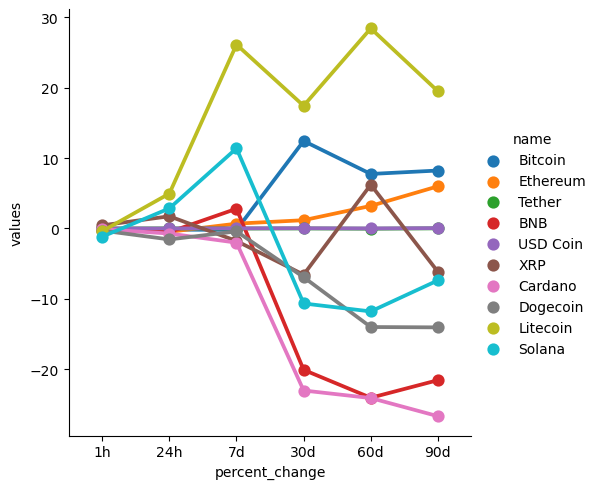

In [18]:
#plot changes over time
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [20]:
#all records of bitcoin, mined
df10 = df[['name', 'quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,30503.27905,2023-07-02 13:36:19.270668+00:00
0,Bitcoin,30503.27905,2023-07-02 13:36:19.270668+00:00
